# Lexical Forward Feature Selection (RF)

In [39]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

The URL dataset with generated lexical features are read from a csv file. These are then displayed for visualization purposes.

In [2]:
dataset = pd.read_csv('final_unbalanced_with_lexical.csv')
dataset.head()

,url_type,url_length,url_ip_in_domain,url_domain_entropy,url_is_digits_in_domain,url_query_length,url_number_of_parameters,url_number_of_digits,url_string_entropy,url_is_https,...,has_swf_in_string,has_cgi_in_string,has_php_in_string,has_abuse_in_string,has_admin_in_string,has_bin_in_string,has_personal_in_string,has_update_in_string,has_verification_in_string,url_scheme
0,2,16,0,3.169925,0,0,0,0,3.375000,0,...,0,0,0,0,0,0,0,0,0,0
1,0,35,0,2.807355,1,0,0,1,4.079143,0,...,0,0,0,0,0,0,0,0,0,0
2,0,31,0,2.921928,0,0,0,1,3.708093,0,...,0,0,0,0,0,0,0,0,0,0
3,1,88,0,2.896292,0,49,4,7,4.660343,0,...,0,0,1,0,0,0,0,0,0,27
4,1,235,0,3.405822,0,194,3,22,4.980518,0,...,0,0,1,0,0,0,0,0,0,27


In [3]:
features = dataset.iloc[:, 1:]
url_type = dataset.iloc[:, 0]

In [4]:
features.head()

,url_length,url_ip_in_domain,url_domain_entropy,url_is_digits_in_domain,url_query_length,url_number_of_parameters,url_number_of_digits,url_string_entropy,url_is_https,url_path_length,...,has_swf_in_string,has_cgi_in_string,has_php_in_string,has_abuse_in_string,has_admin_in_string,has_bin_in_string,has_personal_in_string,has_update_in_string,has_verification_in_string,url_scheme
0,16,0,3.169925,0,0,0,0,3.375000,0,16,...,0,0,0,0,0,0,0,0,0,0
1,35,0,2.807355,1,0,0,1,4.079143,0,35,...,0,0,0,0,0,0,0,0,0,0
2,31,0,2.921928,0,0,0,1,3.708093,0,31,...,0,0,0,0,0,0,0,0,0,0
3,88,0,2.896292,0,49,4,7,4.660343,0,10,...,0,0,1,0,0,0,0,0,0,27
4,235,0,3.405822,0,194,3,22,4.980518,0,10,...,0,0,1,0,0,0,0,0,0,27


In [5]:
url_type.head()

0    2
1    0
2    0
3    1
4    1
Name: url_type, dtype: int64

A forward feature selection algorithm is then ran on the dataset using RF with a scoring that's dependent on accuracy and a cross validatoin of 5.

In [7]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(n_jobs = 8), k_features = 76, forward = True,
                                                      floating = False, verbose = 10, scoring = 'accuracy', n_jobs = 8).fit(features, url_type)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   22.6s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:   57.9s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:  3.2min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  3.8min
[Parallel(n_jobs=8)]: Done  69 out of  76 | elapsed:  4.6min remaining:   27.7s
[Parallel(n_jobs=8)]: Done  76 out of  76 | elapsed:  4.9min finished

[2024-03-10 01:27:55] Features: 1/76 -- score: 0.7791354394876617[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   34.4s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Do

Once all iterations have finished, the results of each iteration are displayed.

In [47]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[0.7815129559643371, 0.7781304157183722, 0.778117659341233, 0.7806545910111187, 0.7772615754032468]",0.779135,"(get_tld,)",0.002113,0.001644,0.000822
2,"(2, 12)","[0.8387551416699727, 0.8370638715469901, 0.8370308503419116, 0.8377825337996555, 0.8377094534634859]",0.837668,"(url_domain_entropy, get_tld)",0.000806,0.000627,0.000314
3,"(2, 12, 23)","[0.8890443279811245, 0.8906416386528303, 0.8891684501748708, 0.8906196168502375, 0.8903690556976562]",0.889969,"(url_domain_entropy, get_tld, url_num_forward_slash)",0.000915,0.000712,0.000356
4,"(2, 9, 12, 23)","[0.9122105526903723, 0.9140271020817239, 0.9131596805345304, 0.9130552800542883, 0.9139948843764681]",0.913289,"(url_domain_entropy, url_path_length, get_tld, url_num_forward_slash)",0.000867,0.000675,0.000337
5,"(2, 9, 12, 19, 23)","[0.9299480091036268, 0.9314618002630864, 0.9308973221276818, 0.931899566738007, 0.9318473664978859]",0.931211,"(url_domain_entropy, url_path_length, get_tld, url_num_periods, url_num_forward_slash)",0.000933,0.000726,0.000363
6,"(2, 6, 9, 12, 19, 23)","[0.9380180819744013, 0.9393021944751843, 0.937098710654069, 0.939510361747664, 0.9387899984339928]",0.938544,"(url_domain_entropy, url_number_of_digits, url_path_length, get_tld, url_num_periods, url_num_forward_slash)",0.00114,0.000887,0.000444
7,"(2, 6, 9, 12, 19, 23, 68)","[0.9410978639884743, 0.9425698953918109, 0.9409928485671034, 0.9426841363470272, 0.9413686902959754]",0.941743,"(url_domain_entropy, url_number_of_digits, url_path_length, get_tld, url_num_periods, url_num_forward_slash, has_php_in_string)",0.000942,0.000733,0.000367
8,"(2, 6, 9, 10, 12, 19, 23, 68)","[0.9442820453928549, 0.9443446850270394, 0.9436863809573524, 0.945513389361591, 0.9442501435506603]",0.944415,"(url_domain_entropy, url_number_of_digits, url_path_length, url_host_length, get_tld, url_num_periods, url_num_forward_slash, has_php_in_string)",0.000768,0.000598,0.000299
9,"(2, 6, 9, 10, 12, 14, 19, 23, 68)","[0.9461821142964525, 0.9466101517967135, 0.9456908701780028, 0.9473090776217571, 0.9459727514746568]",0.946353,"(url_domain_entropy, url_number_of_digits, url_path_length, url_host_length, get_tld, url_num_subdomain, url_num_periods, url_num_forward_slash, has_php_in_string)",0.000725,0.000564,0.000282
10,"(2, 6, 9, 10, 12, 13, 14, 19, 23, 68)","[0.9480717432610194, 0.9483536216148498, 0.9478937203111134, 0.9492613666022863, 0.9480712011275252]",0.94833,"(url_domain_entropy, url_number_of_digits, url_path_length, url_host_length, get_tld, url_domain_len, url_num_subdomain, url_num_periods, url_num_forward_slash, has_php_in_string)",0.000628,0.000488,0.000244


The program then looks for when the accuracy plateaus. For this implementation, a plateau is when the accuracy does not increase by more than 0.1%.

In [28]:
all_iterations = pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
all_iterations_series = pd.Series(all_iterations['avg_score'])
all_iterations_list = all_iterations_series.to_list()

prev = all_iterations_list[0]
for accuracy in all_iterations_list[1:]:
    if accuracy > prev*1.001:
        prev = accuracy
        pass
    else:
        print('Plateus at: ', all_iterations_list.index(prev))

Plateus at:  11
Plateus at:  13
Plateus at:  15
Plateus at:  15
Plateus at:  15
Plateus at:  19
Plateus at:  19
Plateus at:  19
Plateus at:  19
Plateus at:  19
Plateus at:  19
Plateus at:  19
Plateus at:  19
Plateus at:  19
Plateus at:  19
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30
Plateus at:  30


The features from the longest occuring plateau are extracted and is considered as the final featureset.

In [38]:
all_iterations.at[all_iterations.index[30], 'feature_names']

('url_domain_entropy',
 'url_is_digits_in_domain',
 'url_number_of_digits',
 'url_is_https',
 'url_path_length',
 'url_host_length',
 'get_tld',
 'url_domain_len',
 'url_num_subdomain',
 'url_is_encoded',
 'url_num_periods',
 'url_num_of_hyphens',
 'url_num_underscore',
 'url_num_equal',
 'url_num_forward_slash',
 'url_num_question_mark',
 'url_num_semicolon',
 'url_num_at',
 'has_secure_in_string',
 'has_login_in_string',
 'has_ebayisapi_in_string',
 'has_exe_in_string',
 'has_jpg_in_string',
 'has_linkeq_in_string',
 'has_paypal_in_string',
 'has_mailphp_in_string',
 'has_cgi_in_string',
 'has_php_in_string',
 'has_admin_in_string',
 'has_personal_in_string',
 'has_update_in_string')

The accuracy with respect to the number of features are graphed for better visualization.

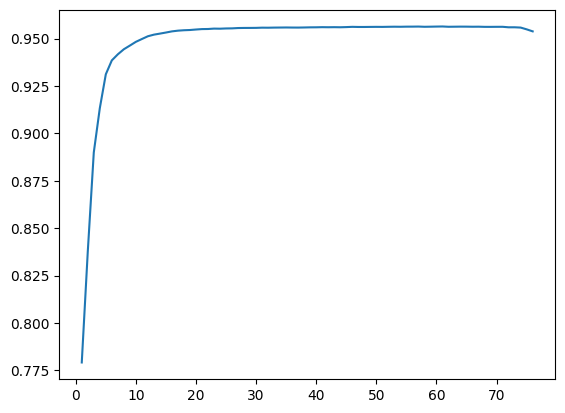

In [45]:
y_points = np.array(list(all_iterations['avg_score']))
x_points = np.array([i for i in range(1, len(y_points) + 1)])

plt.plot(x_points, y_points)

The results of the forward feature selection is saved for easier referencing.

In [46]:
all_iterations.to_csv('lexical_ffs_rf_results.csv', encoding='utf-8', index=False)